# Naive Bayes classifier using tf-idf

## Import useful packages and functions

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix

## Load data

In [2]:
data = pd.read_csv("data/trackGBV_xls_match.csv")
labels = pd.read_csv("data/trackGBV_labels.csv")

## Join `data` and `label` into a single DataFrame

In [3]:
data = data.merge(labels, left_on='docid', right_on='DocID')
data.head()

,docid,contents,DocID,Customary_Practices,Gender_Stereotypes,Other_Factors,Num_Factors,Discrimination_Label
0,80380,Home | Databases | WorldLII | Search | Feedbac...,80380,0,0,1,1,1
1,78839,Home | Databases | WorldLII | Search | Feedbac...,78839,0,0,1,1,1
2,248796,State v Lagivere - Sentence [2017] FJHC 386...,248796,0,0,0,0,0
3,257586,State v Goundar - Sentence [2018] FJHC 438;...,257586,1,1,0,2,1
4,80121,Home | Databases | WorldLII | Search | Feedbac...,80121,0,1,0,1,1


## Build test and train sets

In [4]:
mask = np.random.rand(len(data)) < 0.8
train = data[mask]
test = data[~mask]
print(len(train), len(test))

661 148


In [5]:
docs_train, docs_test = (list(x['contents']) for x in [train, test])
y_train, y_test = (x['Discrimination_Label'] for x in [train, test])

## Apply tf-idf

In [11]:
vectorizer = TfidfVectorizer(stop_words='english',
                            strip_accents='ascii')
X_train = vectorizer.fit_transform(docs_train)

In [12]:
X_test = vectorizer.transform(docs_test)

## Train the classifier

In [13]:
learner = MultinomialNB()
learner.fit(X_train, y_train)

MultinomialNB()

In [14]:
y_hat = learner.predict(X_test)

## Evaluate results

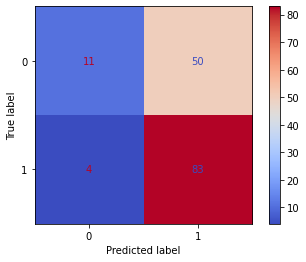

In [15]:
plot_confusion_matrix(learner, X_test, y_test, cmap = 'coolwarm')

In [22]:
learner.score(X_test, y_test)

0.6351351351351351